<a href="https://colab.research.google.com/github/1900690/image-editing/blob/main/%E8%83%8C%E6%99%AF%E6%B6%88%E5%8E%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2.画像の背景を消去する
*   画像の背景は物体検出を行う際の精度低下の原因となるため取り除く

　　　[出典:物体認識における背景の有無による学習効果に関する考察](https://www.osaka-kyoiku.ac.jp/~challeng/SIG-Challenge-044/SigChallenge-044-06.pdf)
*   pythonで使える[rembg](https://github.com/danielgatis/rembg)という[ライブラリ](https://wa3.i-3-i.info/word1473.html#:~:text=%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%EF%BC%88%E8%8B%B1%EF%BC%9Alibrary,%E3%81%A7%E3%81%99%E3%80%82)があるのでインストールして使用する



In [ ]:
#@title rembgをインストール
#rembgをインストール
!pip install rembg
!pip install onnxruntime
#新しくインストールしたライブラリを働かせるためにランタイムを一度リセット
#exit()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
#ライブラリをインポート(機能を使えるようにする)
import shutil
import os
from google.colab import files
import math
file_name ="okbudmask.zip"
#データを解凍
shutil.unpack_archive('/content/'+file_name, '/content/')
#zipを消す
os.remove('/content/'+file_name)

In [ ]:
shutil.rmtree('/content/syakuyaku-semantic-bud-cut-out_20250205160750')

In [ ]:
#@title 背景消去を行う
#ライブラリをインポート
from rembg import remove
import cv2
import shutil
import os

#背景処理前の画像を分離するためにフォルダを作って移動させる
if not os.path.exists('/content/originals_test/'):
  #shutil.copytree('/content/originals_test/','/content/originals/')
  #shutil.rmtree('/content/originals_test/')
  os.mkdir('/content/originals_test/')


read_folda_name='/content/okbudmask/'
read_folda = os.listdir(read_folda_name)

#背景消去
for imgname in read_folda:
  input = cv2.imread('/content/okbudmask/'+imgname)
  output = remove(input)
  cv2.imwrite('/content/originals_test/'+imgname[:-4]+".png", output)

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 108GB/s]


In [ ]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/okbudmask_remove', 'zip', '/content/originals_test')

'/content/okbudmask_remove.zip'

#JPGの黒のみを透過させる

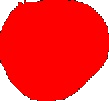

In [ ]:
from PIL import Image
import os

if os.path.exists('/content/jpg_to_png/'):
  shutil.rmtree('/content/jpg_to_png/')
if not os.path.exists('/content/jpg_to_png/'):
  os.mkdir('/content/jpg_to_png/')

def convert_jpg_to_png(input_folder, output_folder):
    # 1. 入力フォルダ内のJPEG画像をリストアップ
    jpg_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]

    # 2. 出力フォルダが存在しなければ作成
    os.makedirs(output_folder, exist_ok=True)

    # 3. 各JPEG画像をPNGに変換
    for jpg_file in jpg_files:
        jpg_path = os.path.join(input_folder, jpg_file)
        # PNGの出力パスを生成
        png_path = os.path.join(output_folder, os.path.splitext(jpg_file)[0] + '.png')

        # 画像の変換
        img = Image.open(jpg_path)
        img.save(png_path, 'PNG')

if __name__ == "__main__":
    input_folder = "/content/okbudmask/"  # JPEG画像があるフォルダ
    output_folder = "/content/jpg_to_png/"  # PNG画像を保存するフォルダ

    convert_jpg_to_png(input_folder, output_folder)


from PIL import Image
import numpy as np

if os.path.exists('/content/png_alpha/'):
  shutil.rmtree('/content/png_alpha/')
if not os.path.exists('/content/png_alpha/'):
  os.mkdir('/content/png_alpha/')

read_folda_name='/content/jpg_to_png/'
read_folda = os.listdir(read_folda_name)

for imgname in read_folda:
  # pngファイルの色情報を読み込む [red, green, blue, alpha]
  img_array = np.array(Image.open('/content/jpg_to_png/'+imgname))

  # Add an alpha channel to the image
  img_array = np.dstack((img_array, np.ones(img_array.shape[:2], dtype=np.uint8) * 255))

  # 黒に近い画素のアルファ値を0にして透過させる
  for row in img_array:
    for pixel in row:
        if pixel[0] <= 70 and pixel[1] <= 70 and pixel[2] <= 70 :
            pixel[3] = 0 # Modify alpha channel directly instead of using np.put

  img = Image.fromarray(img_array)

  img.save('/content/png_alpha/'+imgname[:-4]+".png") # Changed this line

img

In [ ]:
#@markdown 作ったファイルをダウンロード
import shutil
import os
from google.colab import files

shutil.make_archive('/content/mask_segmentation', 'zip', '/content/png_alpha')

'/content/mask_segmentation.zip'